100%|██████████| 7/7 [00:18<00:00,  2.69s/it]

Drink number 0.2745964215671047
Drink number per rotation 0.7177966317961301


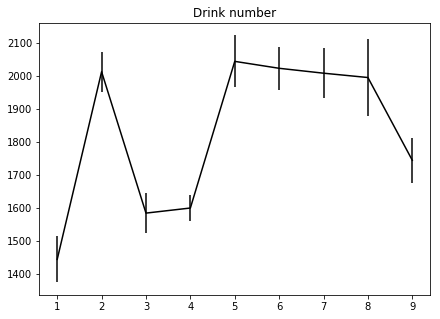

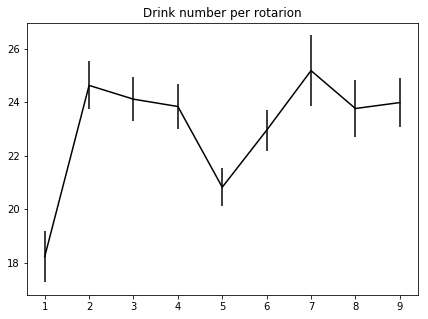

In [16]:
import scipy.io as sci
import os
import seaborn as sns
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import heapq
import numpy.ma as ma
from scipy.signal import savgol_filter
from scipy.fftpack import fft
from scipy import stats
import scipy
from tqdm import tqdm

np.set_printoptions (threshold=np.inf, linewidth=1000, suppress=True)

def tukey_hsd( ind, *args):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    data_arr = np.hstack(args)

    ind_arr = np.array([])
    for x in range(len(args)):
        ind_arr = np.append(ind_arr, np.repeat(ind[x], len(args[x])))
    print(pairwise_tukeyhsd(data_arr, ind_arr))

f2 = [1127, 1128, 1129, 1130, 1202, 1203, 1204, 1205, 1206, 1207]  #1201==6s
ID2 = [198, 199, 200, 201, 204, 205, 207] # n=7 [198,199, 200,201,204,205,207]


start = 1
finish = 10
day = finish - start
Inthigh =800
high =500
low = 0
cut = 600
thr = 15000
drinkst = [[] for i in range(9)]
drinkend = [[] for i in range(9)]
drinkstpower = [[] for i in range(9)]
drinkendpower =[[] for i in range(9)]
mn1 = 20
mx1 = 200
mn2 = 40
mx2 = 200
N = 600
dt = 0.01

Wheel_rotation = np.zeros((9,7))
Drink_success = np.zeros((9,7))
Drink_success_per_rotation = np.zeros((9,7))

for number in tqdm(range(7)):  # put mouse number
    mouse = ID2[number]

    Variance = np.zeros ((24, 24))
    RVariance = np.zeros ((12, 12))
    LVariance = np.zeros ((12, 12))

    Variance_mean = np.zeros (24)
    Var_ave_learn = np.zeros (day)
    Var_peak_learn = np.zeros (day)
    Var_base_learn = np.zeros (day)
    Var_peak2_learn = np.zeros (day)

    for num in range (start, finish):  # put file nuber
        corrwin = np.arange (-300, 300, 2)
        corr = np.zeros (len (corrwin))
        PATH = '/Users/kouhiro1006/Project/Chunk_Rhythm_paper_analysis/wheel_analyze/analyze_new/behav_data/All_in_one'
        os.chdir (PATH)
        matdata = sci.loadmat (str (mouse) + "01_19" + str (f2[num]))  # new data C9 10days
        # print(matdata.keys())
        Data = matdata["data"]
        peg = matdata["RLPegTouchAll"]
        drink = matdata["DrinkOnArray"]
        for j in range(5):
            delete = []
            eachdrinkdiff = np.diff(drink)
            for i in range(len(eachdrinkdiff)):
                if eachdrinkdiff[i] < 40:
                    delete.append(i)
            drink = np.delete(drink, delete)
        RPegTimeArray_turn = matdata["RpegTimeArray2D_turn"]
        LPegTimeArray_turn = matdata["LpegTimeArray2D_turn"]
        RpegTouchCell = matdata["RpegTouchCell"]
        LpegTouchCell = matdata["LpegTouchCell"]
        RpegTouchTurn = matdata["RpegTouchTurn"]
        LpegTouchTurn = matdata["LpegTouchTurn"]
        wateroffarray = matdata["WaterOffArray"]
        wateronarray = matdata["WaterOnArray"]
        oneturn = Data[:, 4][np.nonzero (Data[:, 4])]
        drink_turn = [[] for j in range (len (oneturn))]
        drink2 = matdata["DrinkOnArray"]
        for i in range (len (drink2)):
            counter5 = 0
            for j in range (len (oneturn)):
                if drink2[i] > oneturn[j]:
                    drink2[i] = drink2[i] - oneturn[j]
                    counter5 = counter5 + 1
                else:
                    drink_turn[counter5].extend (drink2[i])
                    break
#         color = [[0, 0, 0]]
#         fig = plt.figure (figsize=(12, 5))
#         plt.eventplot (drink_turn, colors=color, linelengths=1)
#         plt.xlim (left=0, right=4000)
#         plt.show()
        Wheel_rotation[num-1][number] = len(oneturn)
        Drink_success[num-1][number] = len(drink2)
        Drink_success_per_rotation[num-1][number] = len(drink2)/len(oneturn)
        
        
plt.figure(figsize = (7,5))
plt.title("Drink number")
x = np.arange(1,10)
y = np.mean(Drink_success,axis=1)
y_err = [np.std(Drink_success[i])/len(Drink_success[i]) for i in range(len(Drink_success))]
plt.errorbar(x,y,yerr=y_err,color='k')

result = scipy.stats.f_oneway(Drink_success[0], Drink_success[1], Drink_success[2], Drink_success[3], Drink_success[4],
                              Drink_success[5], Drink_success[6], Drink_success[7], Drink_success[8])
print("Drink number", result.pvalue)
if result.pvalue < 0.05:
    tukey_hsd(list("ABCDEFGHI"), Drink_success[0], Drink_success[1], Drink_success[2], Drink_success[3], Drink_success[4],
                              Drink_success[5], Drink_success[6], Drink_success[7], Drink_success[8])


plt.figure(figsize = (7,5))
plt.title("Drink number per rotarion")
x = np.arange(1,10)
y = np.mean(Drink_success_per_rotation, axis=1)
y_err = [np.std(Drink_success_per_rotation[i])/len(Drink_success_per_rotation[i]) for i in range(len(Drink_success_per_rotation))]
plt.errorbar(x,y,yerr=y_err, color='k')

result = scipy.stats.f_oneway(Drink_success_per_rotation[0], Drink_success_per_rotation[1], Drink_success_per_rotation[2], Drink_success_per_rotation[3], Drink_success_per_rotation[4],
                              Drink_success_per_rotation[5], Drink_success_per_rotation[6], Drink_success_per_rotation[7], Drink_success_per_rotation[8])
print("Drink number per rotation", result.pvalue)
if result.pvalue < 0.05:
    tukey_hsd(list("ABCDEFGHI"), Drink_success_per_rotation[0], Drink_success_per_rotation[1], Drink_success_per_rotation[2], Drink_success_per_rotation[3], Drink_success_per_rotation[4],
                              Drink_success_per_rotation[5], Drink_success_per_rotation[6], Drink_success_per_rotation[7], Drink_success_per_rotation[8])